Дерево по умолчанию: правильность на обучающем наборе:1.000
Дерево по умолчанию: правильность на тестовом наборе:0.937
Дерево с обрезкой: правильность на обучающем наборе:0.988
Дерево с обрезкой: правильность на тестовом наборе:0.951


<module 'sklearn.tree' from 'c:\\users\\валерия смелова\\appdata\\local\\programs\\python\\python39\\lib\\site-packages\\sklearn\\tree\\__init__.py'>

Важности признаков:
[0.         0.01204155 0.         0.         0.01354675 0.00752597
 0.         0.         0.         0.         0.         0.05299944
 0.         0.01206867 0.00238745 0.         0.         0.
 0.         0.         0.69546322 0.04179055 0.         0.00903116
 0.         0.         0.01740312 0.12436954 0.01137258 0.        ]


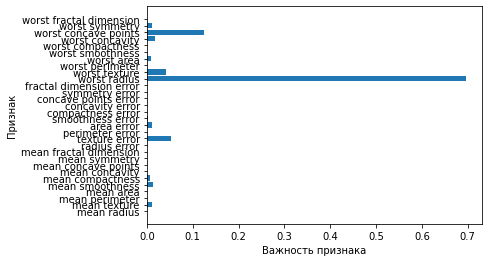

Feature importances: [0. 1.]


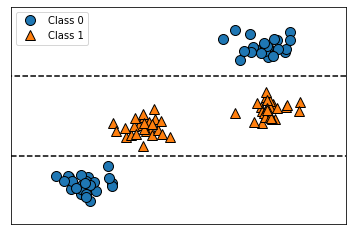

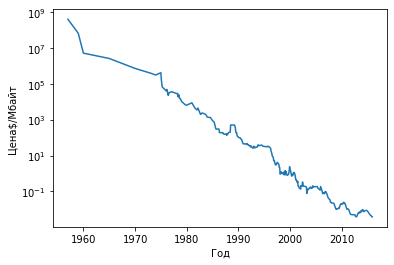

<ipython-input-9-1f7662e159b1>:103: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_train=data_train.date[:,np.newaxis]
<ipython-input-9-1f7662e159b1>:109: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_all=ram_prices.date[:,np.newaxis]


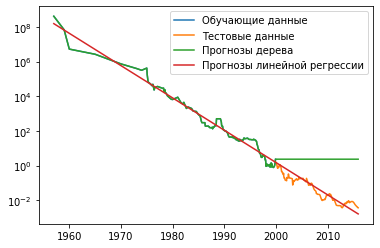

In [9]:
import sklearn
import mglearn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split


#посмотрим на построение дерева по умолчанию
#дерево имеет чистые листы - 100% правильности на обучающем наборе
cancer=load_breast_cancer()
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=42)
tree=DecisionTreeClassifier(random_state=0)
tree.fit(X_train,y_train)
print("Дерево по умолчанию: правильность на обучающем наборе:{:.3f}".format(tree.score(X_train,y_train)))
print("Дерево по умолчанию: правильность на тестовом наборе:{:.3f}".format(tree.score(X_test,y_test)))

#посмотрим на построение дерева с предварительной обрезкой
#правильность на обучающем снизилась, на тестовом увеличилась - увеличили обобщающую способность
tree=DecisionTreeClassifier(max_depth=4,random_state=0)
tree.fit(X_train,y_train)
print("Дерево с обрезкой: правильность на обучающем наборе:{:.3f}".format(tree.score(X_train,y_train)))
print("Дерево с обрезкой: правильность на тестовом наборе:{:.3f}".format(tree.score(X_test,y_test)))

#визуализируем дерево
from sklearn.tree import export_graphviz
export_graphviz(tree,out_file="tree.dot",
                 class_names=["malignant","benign"],
                 feature_names=cancer.feature_names,
                 impurity=False,filled=True)
import graphviz 
with open("D://PythonLabs//tree.dot")as f:
    dot_graph=f.read()
graphviz.Source(dot_graph)

# пытаюсь в пдф
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn import tree
cancer=load_breast_cancer()
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=42)
clf=tree.DecisionTreeClassifier(max_depth=4,random_state=0)
clf=clf.fit(X_train,y_train)

import pydotplus 
dot_data=tree.export_graphviz(clf,out_file=None)
graph=pydotplus.graph_from_dot_data(dot_data)
graph.write_pdf("cancer.pdf")

# пытаюсь через Ipython
from IPython.display import Image
dot_data=tree.export_graphviz(clf,out_file=None,
                              feature_names=cancer.feature_names,
                              class_names=cancer.target_names,
                              filled=True,rounded=True,special_characters=True)
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

#связь признака и класса
from IPython.display import display
display(tree)





#смотрим на важность признаков
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier().fit(X_train,y_train)
print("Важности признаков:\n{}".format(tree.feature_importances_))

def plot_feature_cancer(model):
    n_features=cancer.data.shape[1]
    plt.barh(range(n_features),model.feature_importances_,align='center')
    plt.yticks(np.arange(n_features),cancer.feature_names)
    plt.xlabel("Важность признака")
    plt.ylabel("Признак")
    plt.show()
plot_feature_cancer(tree)



#смотрим на то, как признак и целевой класс не связаны
tree=mglearn.plots.plot_tree_not_monotone()
plt.show()

#смотрим на цены на память
import pandas as pd
ram_prices=pd.read_csv("ram_price.csv")
plt.semilogy(ram_prices.date,ram_prices.price)
plt.xlabel("Год")
plt.ylabel("Цена$/Мбайт")
plt.show()


#сравним прогнозы дерева решений и линейной регрессии с реальными данными
# дерево не справилось за диапазоном(((
from sklearn.tree import DecisionTreeRegressor
data_train=ram_prices[ram_prices.date<2000]
data_test=ram_prices[ram_prices.date>=2000]
y_train=np.log(data_train.price)
X_train=data_train.date[:,np.newaxis]


tree=DecisionTreeRegressor().fit(X_train,y_train)
from sklearn.linear_model import LinearRegression
linear_reg=LinearRegression().fit(X_train,y_train)
X_all=ram_prices.date[:,np.newaxis]
pred_tree=tree.predict(X_all)
pred_lr=linear_reg.predict(X_all)
price_tree=np.exp(pred_tree)
price_lr=np.exp(pred_lr)

plt.semilogy(data_train.date,data_train.price,label="Обучающие данные")
plt.semilogy(data_test.date,data_test.price,label="Тестовые данные")
plt.semilogy(ram_prices.date,price_tree,label="Прогнозы дерева")
plt.semilogy(ram_prices.date,price_lr,label="Прогнозы линейной регрессии")
plt.legend()
plt.show()


